This notebook will explore rotational effects on BandRatios around 20 Hz 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fooof import FOOOFGroup, FOOOF
from fooof.synth import *

from utils.analysis import *

In [6]:
THETA_BAND = [4,8]
BETA_BAND = [15, 25]
ROTATION_FREQ = 20
ROT_START = -1.5
ROT_END = .5
ROT_INC = .2
rot_differences = []

The above cell generates 50 power spectra and calculates the ratio between them. This is used as a baseline to compare rotations to.

In [4]:
# Generate freqs and powers
freqs, ps, _ = gen_group_power_spectra(50,[1,50], [0,1],[] )

fg = FOOOFGroup()
fg.add_data(freqs, ps)
fg.fit()

Running FOOOFGroup across 50 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



In [5]:
# Calculate control ratio 
control_ratio =calc_group_band_ratio(fg, THETA_BAND, BETA_BAND)
avg_control_ratio = np.mean(control_ratio)
avg_control_ratio

0.5925608225064702

The following cell rotates each ps from -1.5 to .5

In [14]:
rotated_ratios = []
for curr_ps in ps:
    ps_instance_ratios = []
    rot_step = Stepper(ROT_START, ROT_END, ROT_INC)
    
    for delta in rot_step:
        r_ps = rotate_spectrum(freqs, curr_ps, delta, ROTATION_FREQ)
        ps_instance_ratios.append(calc_band_ratio(freqs, r_ps, THETA_BAND, BETA_BAND))
        
    rotated_ratios.append(ps_instance_ratios)

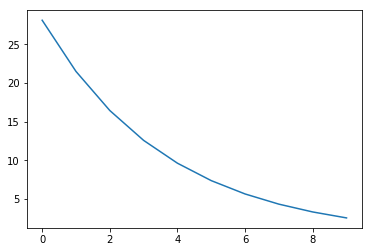

In [25]:
rot_ratios = []
trans = np.array(rotated_ratios).T.tolist()
for i in trans:
    rot_ratios.append(np.mean(i))
plt.plot(rot_ratios)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



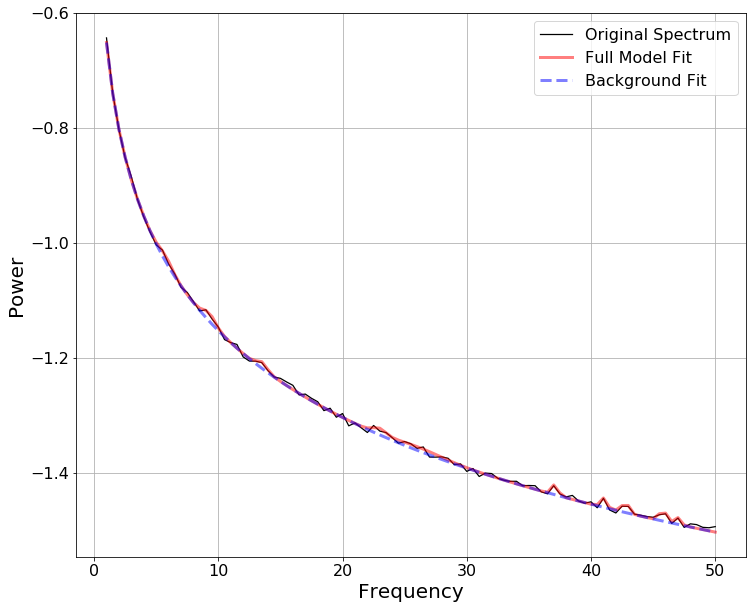

In [50]:
fm = FOOOF()
fm.add_data(freqs, r_ps[0])
fm.fit()
fm.plot()

In [51]:
altered_ratio = calc_band_ratio(freqs, r_ps[0], THETA_BAND, BETA_BAND)
altered_ratio

1.8439648646649909

In [6]:
gen_group_power_spectra?

In [19]:
rot_step = Stepper(-1.5, 1.5, .2)

# Generate freqs and powers
freqs, ps = gen_power_spectrum([1,50], [0,1],[] )

# Calculate control ratio 
control_ratio =calc_band_ratio(freqs, ps, THETA_BAND, BETA_BAND)

for i in rot_step:
    r_ps = rotate_spectrum(freqs, ps, i, ROTATION_FREQ)
    
    altered_ratio = calc_band_ratio(freqs, r_ps, THETA_BAND, BETA_BAND)
    
    rot_differences.append((i,control_ratio-altered_ratio))

In [20]:
rot_differences

[(-1.5, -19.190564024118316),
 (-1.3, -14.091755041462765),
 (-1.1, -10.157034662707964),
 (-0.9000000000000001, -7.117957423661929),
 (-0.7000000000000002, -4.768504629558949),
 (-0.5000000000000002, -2.9504693769862897),
 (-0.30000000000000027, -1.5422806546315457),
 (-0.10000000000000031, -0.4504542781526566),
 (0.09999999999999964, 0.39694926705443256),
 (0.2999999999999996, 1.055333291287511),
 (0.49999999999999956, 1.5674009626585397),
 (0.6999999999999993, 1.9660948542525245),
 (0.8999999999999995, 2.2768506971843223),
 (1.0999999999999996, 2.5193263254318827),
 (1.2999999999999994, 2.708728835399313)]